# Project : Evaluate Cars Condition based on given feature


- buying	Feature	Categorical		buying price	
- maint	Feature	Categorical		price of the maintenance	
- doors	Feature	Categorical		number of doors	
- persons	Feature	Categorical		capacity in terms of persons to carry		
- lug_boot	Feature	Categorical		the size of luggage boot		
- safety	Feature	Categorical		estimated safety of the car		
- class	Target	Categorical		evaulation level (unacceptable, acceptable, good, very good)	


##### based on this feature predict the car condition

### Step 1: Import Dependencies 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import (LabelEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (confusion_matrix, 
                             accuracy_score,
                             classification_report)

### Step 2: Load Dataset 

In [45]:
df = pd.read_csv(r"cars.csv", header=None)
df.columns=['buying','maint','doors','persons','lug_boot','safety','classes']
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
df.shape

(1728, 7)

In [47]:
# check category level of all columns
for col in df.columns:
    print("----------------{}-----------------------".format(col))
    print(df[col].value_counts())
    print()

----------------buying-----------------------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

----------------maint-----------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

----------------doors-----------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

----------------persons-----------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64

----------------lug_boot-----------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

----------------safety-----------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64

----------------classes-----------------------
classes
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



in the above values counts we can see in two column we have category and numbers so we need to replace the categories with numbers using label encoder 

### Step 3: Data Preprocessing

In [48]:
# check missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

in the above data we can see there is no missing values 

In [49]:
# check basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   classes   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


we need to perform label encoder on all the columns bcoz all the columns contain object data type

In [50]:
# apply label encoder to convert categories into numeric values
le = LabelEncoder()

for x in df.columns:
    
    print(x)
    df[x]=le.fit_transform(df[x])
    le_name = dict(zip(le.classes_, le.transform(le.classes_)))
    print("--------------------------------------------------")
    print("Feature: ", x)
    print("Mapping: ", le_name)    

buying
--------------------------------------------------
Feature:  buying
Mapping:  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
maint
--------------------------------------------------
Feature:  maint
Mapping:  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
doors
--------------------------------------------------
Feature:  doors
Mapping:  {'2': 0, '3': 1, '4': 2, '5more': 3}
persons
--------------------------------------------------
Feature:  persons
Mapping:  {'2': 0, '4': 1, 'more': 2}
lug_boot
--------------------------------------------------
Feature:  lug_boot
Mapping:  {'big': 0, 'med': 1, 'small': 2}
safety
--------------------------------------------------
Feature:  safety
Mapping:  {'high': 0, 'low': 1, 'med': 2}
classes
--------------------------------------------------
Feature:  classes
Mapping:  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [51]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### Step 4: Seprate X and y

In [54]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes'], dtype='object')

In [ ]:
# # USING FEATURE NAME FOR X AND Y 
# X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
# y = df["classes"]

In [52]:
X = df.iloc[  :  ,  :-1]  # independent variables
y = df.iloc[  :  ,   -1]  # dependent variable

### Step 5: Data Spliting 

In [53]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=10)  
# verify spliting data
print("Total Data: ", df.shape)
print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Test y: ", y_test.shape)

Total Data:  (1728, 7)
Train X:  (1209, 6)
Train y:  (1209,)
Test X:  (519, 6)
Test y:  (519,)


### Step 6: Data Normalisation

In [55]:
# perform data normalisation

# create object for scaler
scaler = MinMaxScaler()

# fit the train data on scaler object 
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Note: In this data set we can see all the values from all the columns and rows are ranging from 0 to 5 so there is no extreme high and low values so thats why we dont need to perfom standardsiation and normalisation

In [56]:
# compare normal and scale data
print(X_train.iloc[0])
print(X_train_scale[0])

buying      0
maint       0
doors       1
persons     2
lug_boot    0
safety      0
Name: 593, dtype: int32
[0.         0.         0.33333333 1.         0.         0.        ]


### Step 7: Build Model

#### 1. Decision Tree 

In [57]:
# create model object  with default parameter 
model_dt = DecisionTreeClassifier()

# create model object  with custom parameter 
# model_dt = DecisionTreeClassifier(criterion='gini',
#                                   random_state=10, 
#                                   min_samples_leaf=5, 
#                                   min_samples_split=20,
#                                   max_leaf_nodes=15,
#                                   max_depth=6)

#fit the model on the data and predict the values
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
model_dt.get_depth()

14

In [59]:
# prediction on Test Data
y_pred= model_dt.predict(X_test)

# print(list(zip(y_test,y_pred)))

In [60]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

---------Confusion Matrix------------
[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

---------Accuracy Score------------
0.9845857418111753

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519



## Tunned Dt model


In [83]:
# criterion='gini',
# splitter='best',
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.0,
# max_features=None,
# random_state=None,
# max_leaf_nodes=None,
# min_impurity_decrease=0.0,
# class_weight=None,
# ccp_alpha=0.0,

model_dt2 = DecisionTreeClassifier(criterion='gini',
                                  random_state=10, 
                                  min_samples_leaf=10, 
                                  min_samples_split=2,
                                  max_leaf_nodes=30,
                                  max_depth=6)

#fit the model on the data and predict the values
model_dt2.fit(X_train, y_train)
print("Dept: ", model_dt2.get_depth())

# prediction on Test Data
y_pred2= model_dt2.predict(X_test)

# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred2))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred2))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred2))

Dept:  6
---------Confusion Matrix------------
[[ 81   0  13   8]
 [ 17   0   0   4]
 [ 19   0 352   0]
 [  0   0   0  25]]

---------Accuracy Score------------
0.882466281310212

---------Classification Report------------
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       102
           1       0.00      0.00      0.00        21
           2       0.96      0.95      0.96       371
           3       0.68      1.00      0.81        25

    accuracy                           0.88       519
   macro avg       0.58      0.69      0.63       519
weighted avg       0.86      0.88      0.87       519



C:\Users\Dev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# feature importance for all columns
# total will be 1 

print(list(zip(df.columns, model_dt.feature_importances_)))

[('buying', 0.14929199779103852), ('maint', 0.2524437370839914), ('doors', 0.06032514597076629), ('persons', 0.19505114267841134), ('lug_boot', 0.09713332412056555), ('safety', 0.24575465235522678)]


In [ ]:
# from sklearn import tree
# import graphviz

# with open("model_DecisionTree.txt", "w") as f:
#     f = tree.export_graphviz(model_dt, feature_names=cars_df.columns[:-1], out_file=f)
    
# # generate the file and upload the code in webgraphviz.com to plot the decision tree

In [ ]:
df.columns[:-1]

CPU times: total: 1.8 s
Wall time: 6.13 s


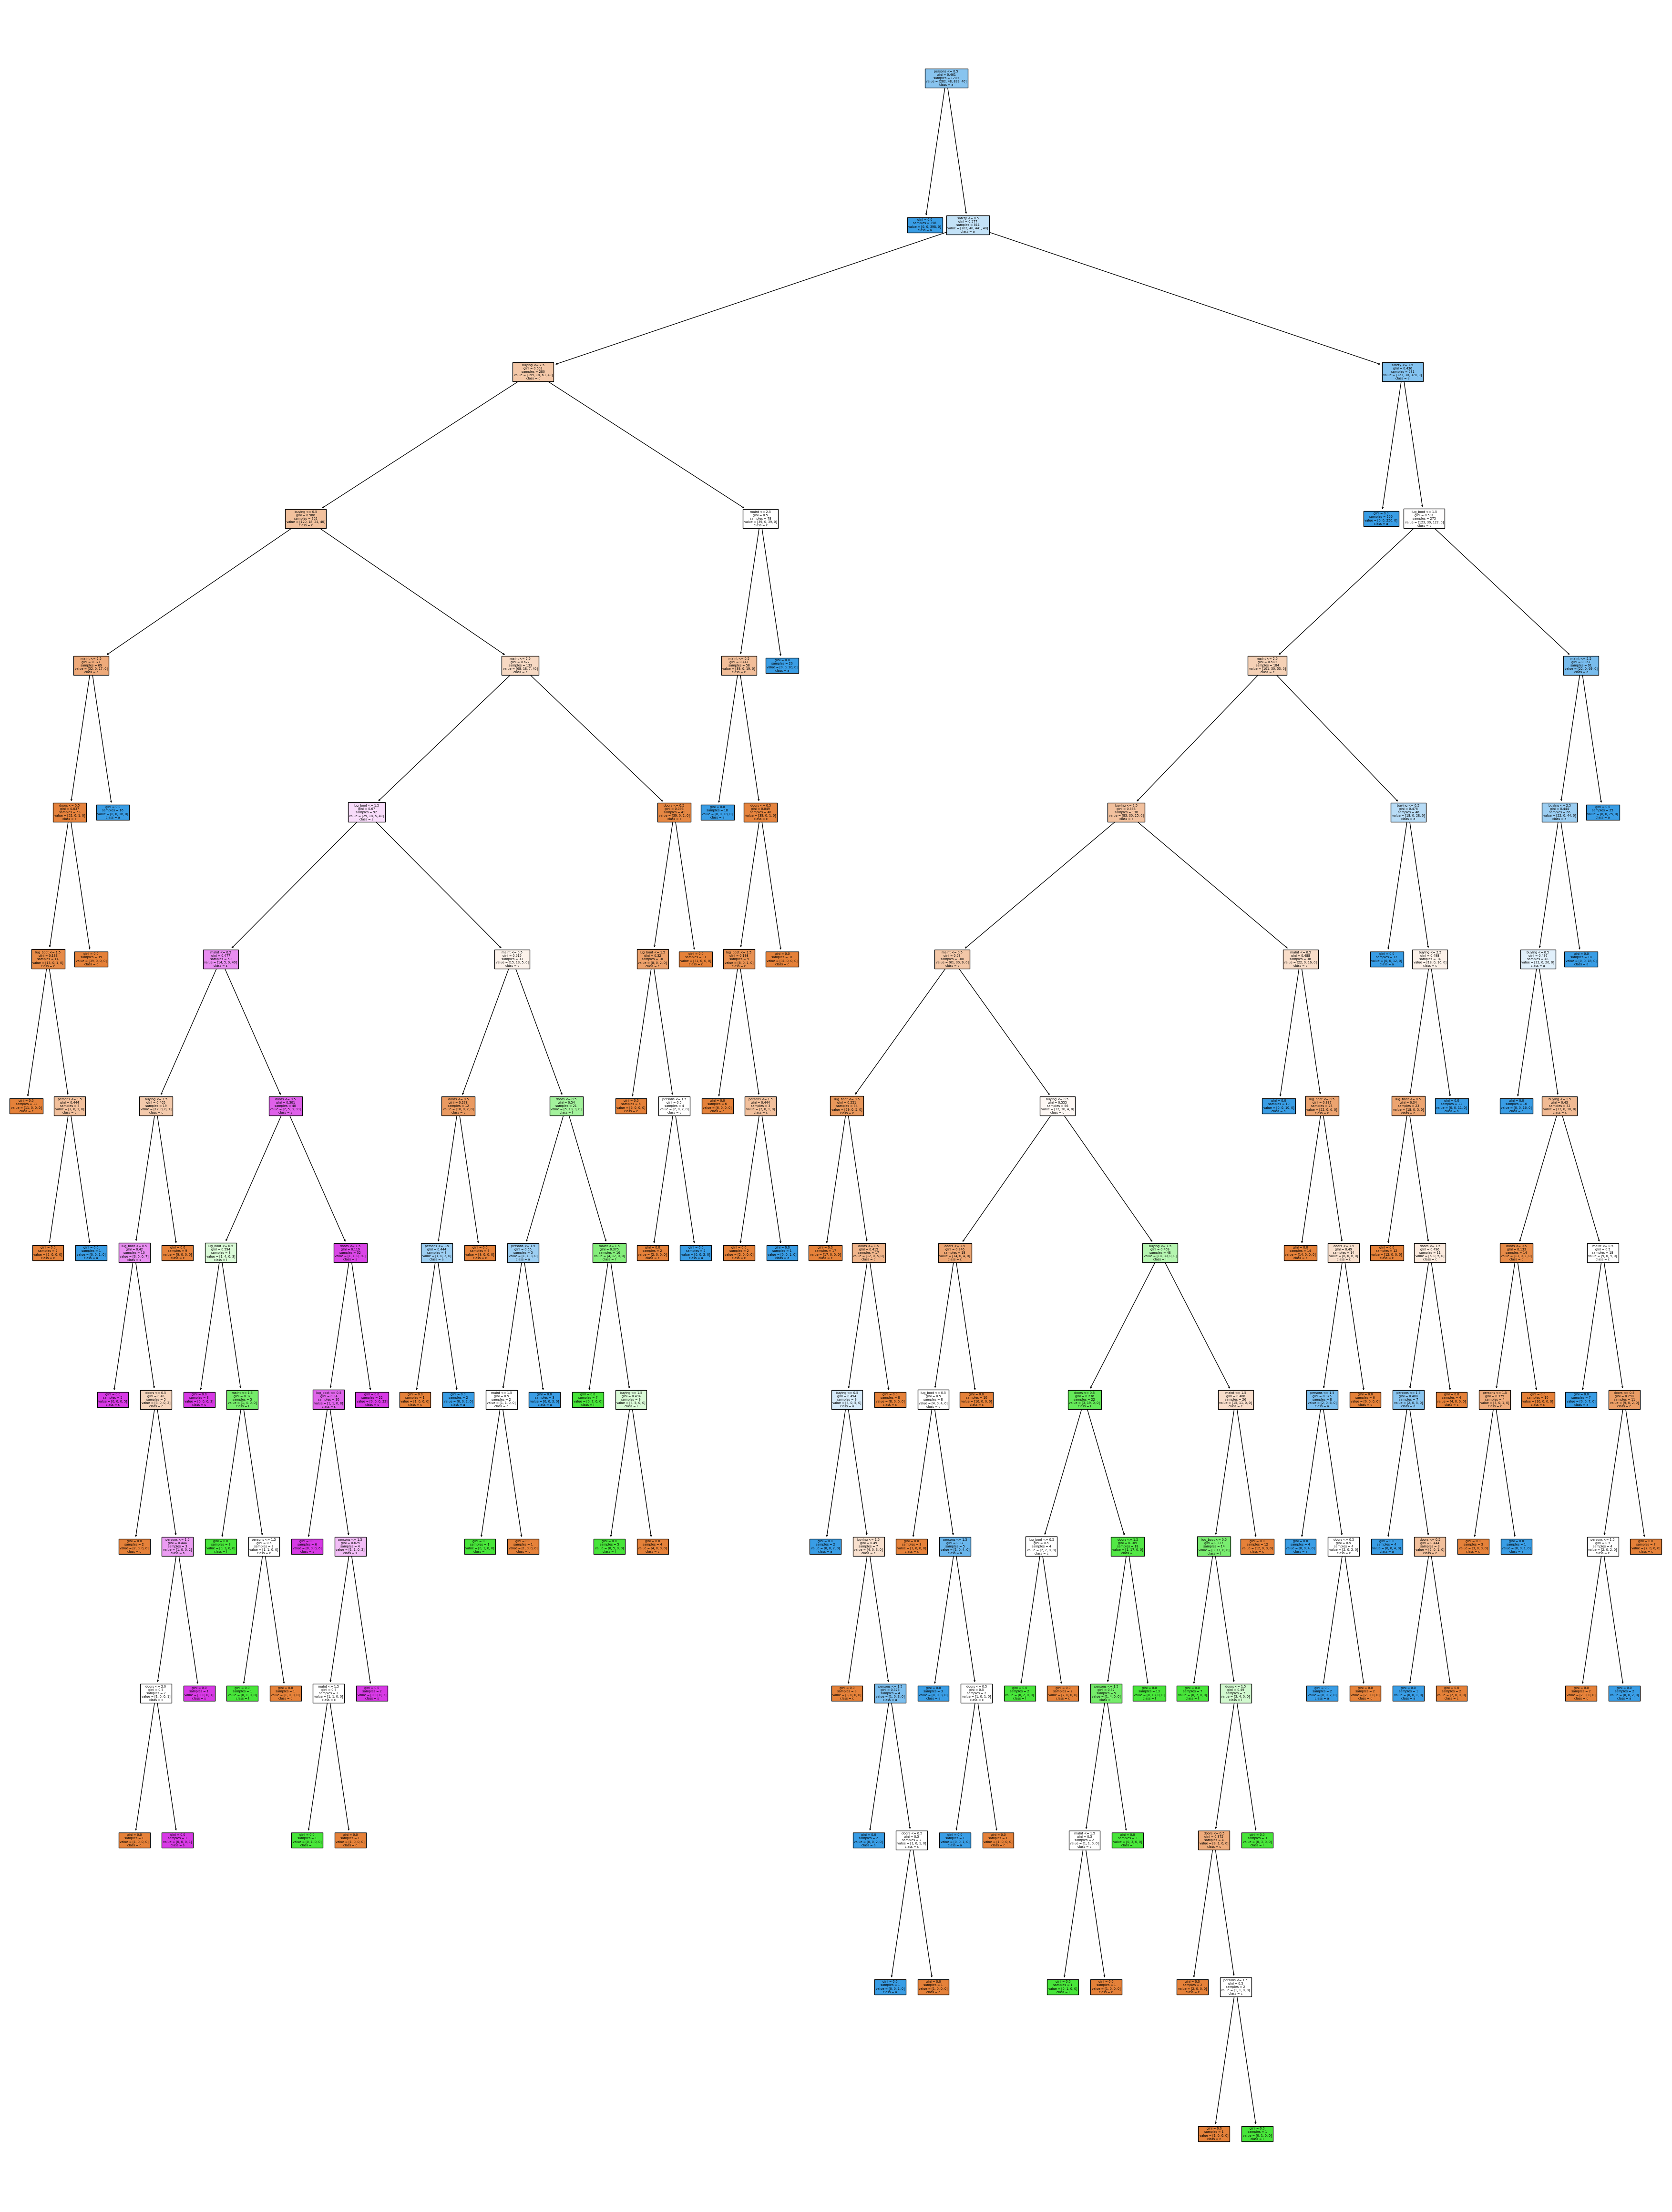

In [81]:
%%time

# it will take 5 to 6 mins to create image so wait.....
fig = plt.figure(figsize=(45,60)) 
dot_data = tree.plot_tree(model_dt, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=list(df.columns[-1]),
                   filled=True)
plt.savefig("base_model1.jpeg")

CPU times: total: 688 ms
Wall time: 2.25 s


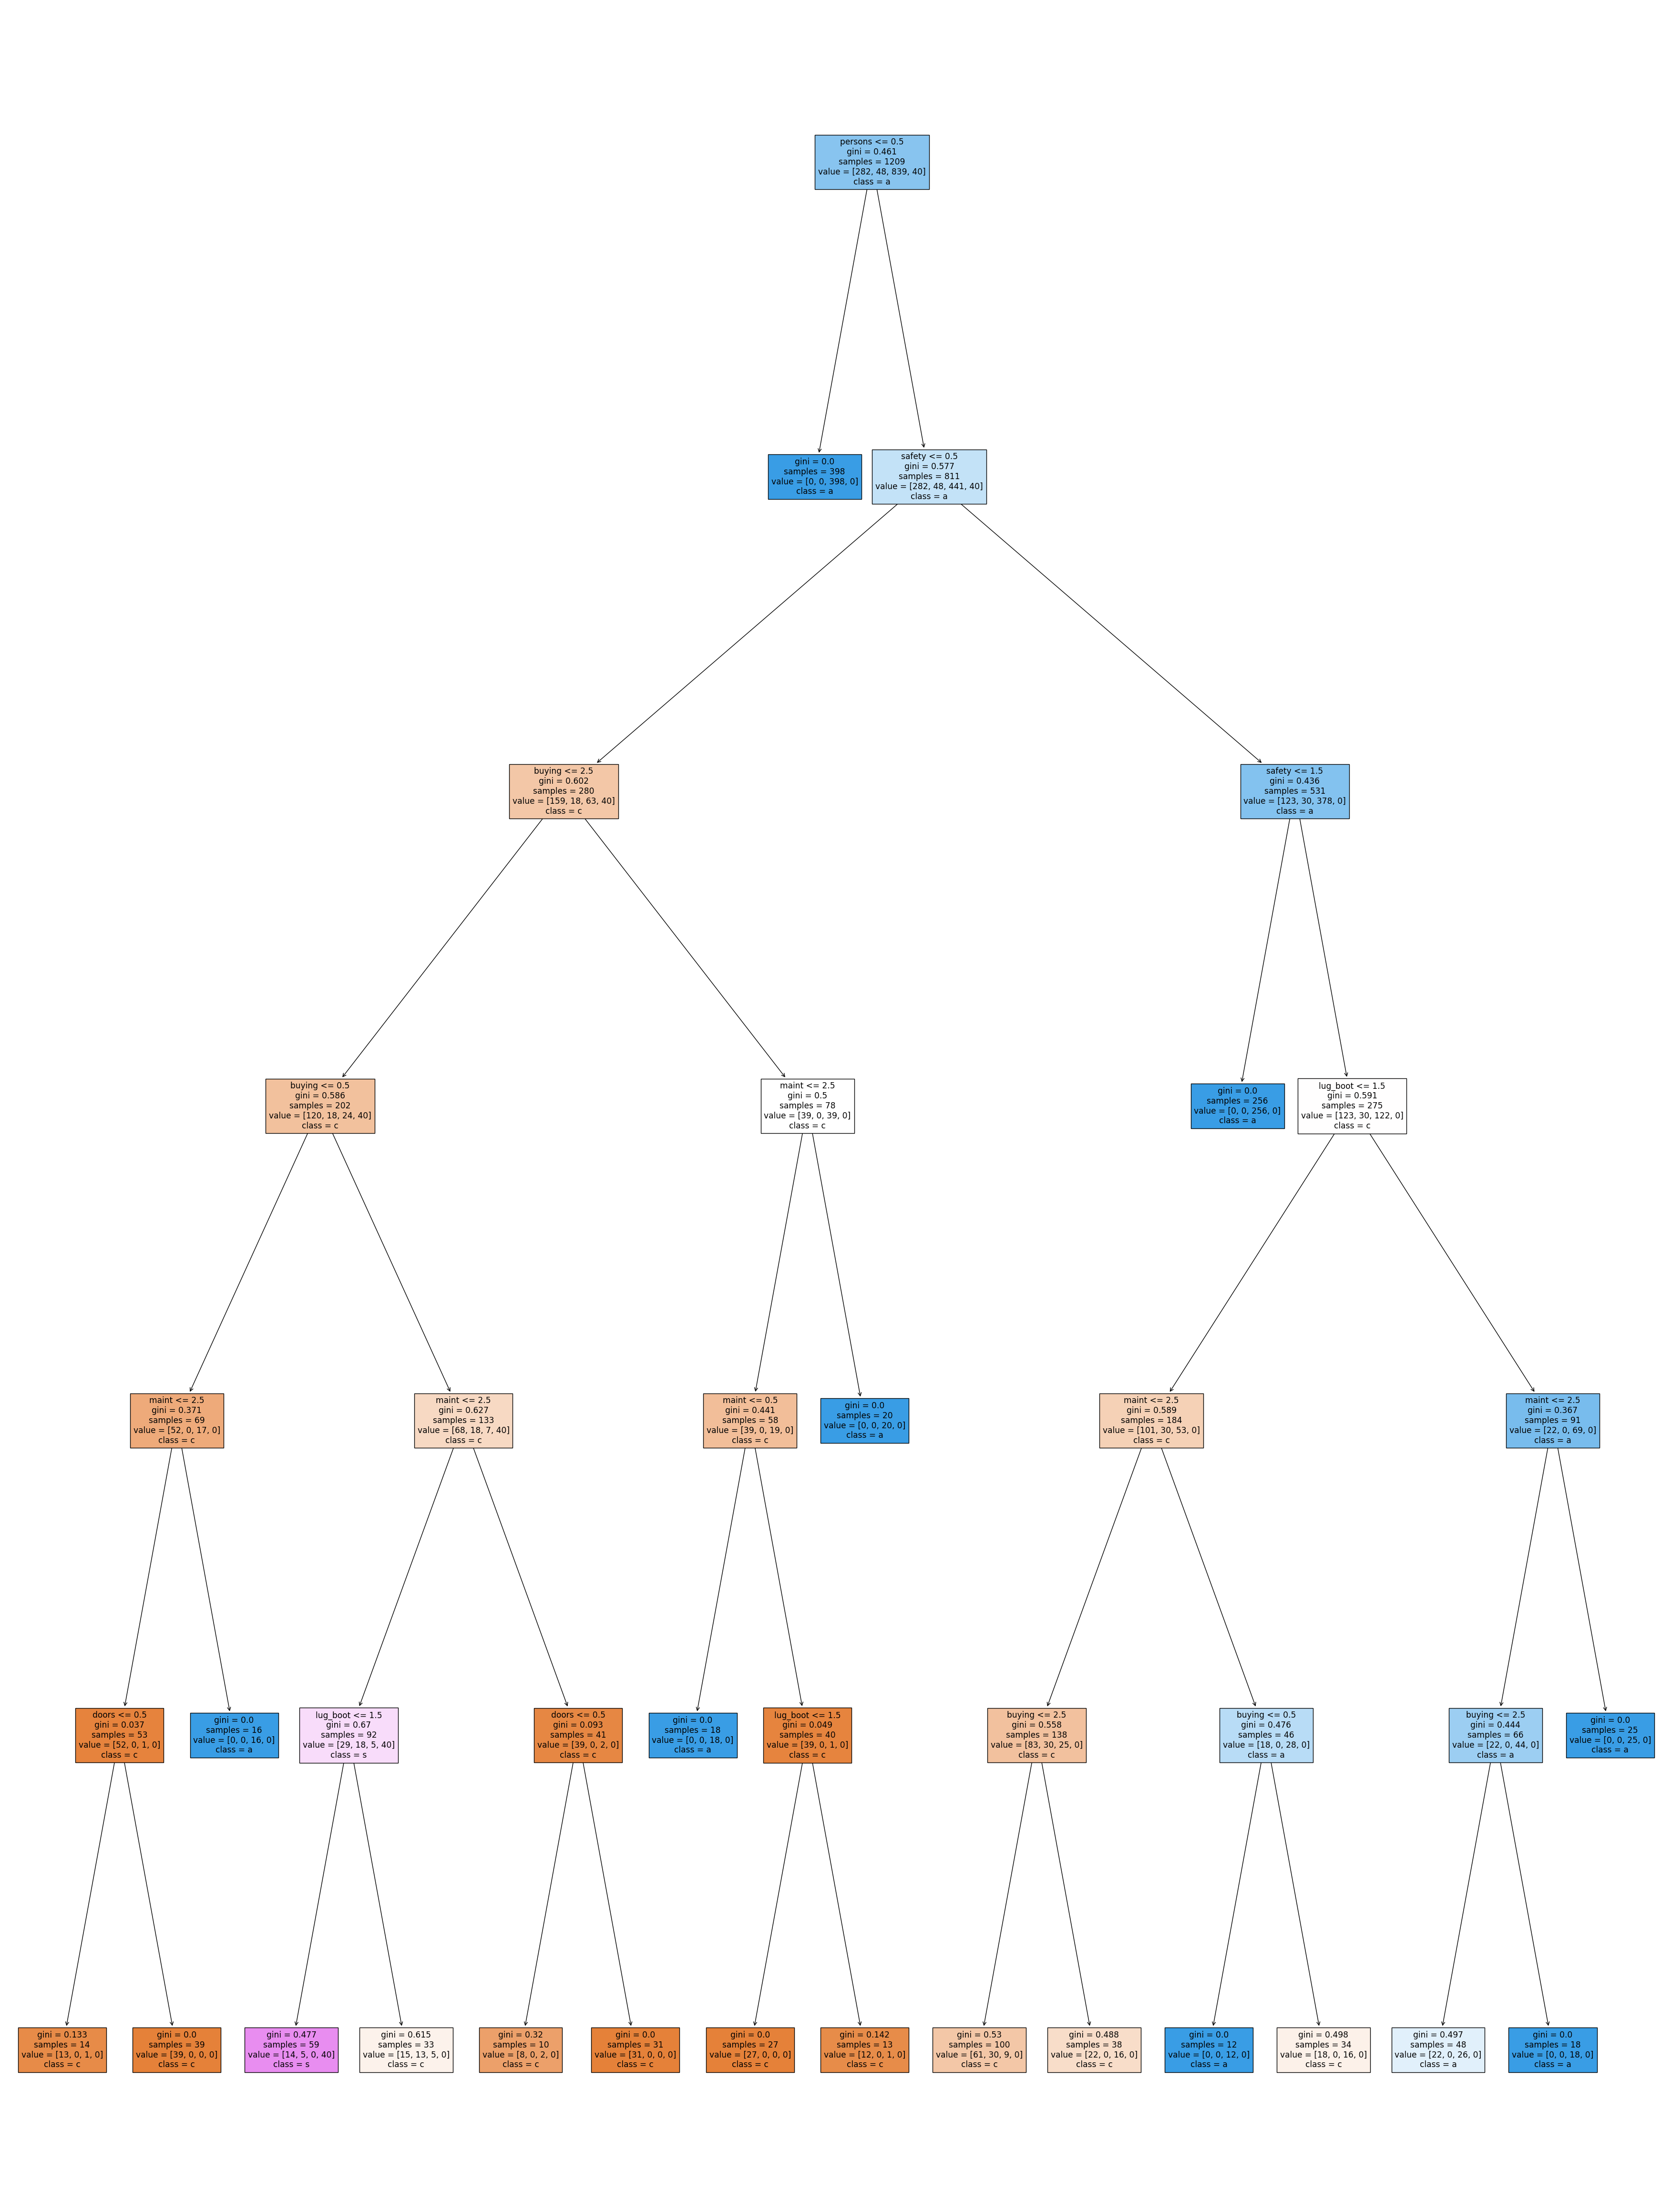

In [84]:
%%time

# it will take 5 to 6 mins to create image so wait.....
fig = plt.figure(figsize=(45,60)) 
dot_data = tree.plot_tree(model_dt2, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=list(df.columns[-1]),
                   filled=True)
plt.savefig("tuned_model1.jpeg")

#### 2.  USING SVM

In [ ]:
# create svm object 
svc_model = svm.SVC()

# train svm model on train dataset
svc_model.fit(X_train, y_train)

# predict on test dataset
y_pred=svc_model.predict(X_test)

In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

In [109]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

df = pd.DataFrame(X)
df["Category"] = y
df.head()

,sepal length,sepal width,petal length,petal width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
df["Category"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [111]:
df["Label"]  = df["Category"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [112]:
df = df.sample(frac=1)

In [113]:
df.shape

(150, 6)

In [116]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Category', 'Label'],
      dtype='object')

In [114]:
df.head()

,sepal length,sepal width,petal length,petal width,Category,Label
36,5.5,3.5,1.3,0.2,Iris-setosa,0
41,4.5,2.3,1.3,0.3,Iris-setosa,0
45,4.8,3.0,1.4,0.3,Iris-setosa,0
129,7.2,3.0,5.8,1.6,Iris-virginica,2
58,6.6,2.9,4.6,1.3,Iris-versicolor,1


In [117]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df.Label

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=10)  

model_dt3 = DecisionTreeClassifier()

#fit the model on the data and predict the values
model_dt3.fit(X_train, y_train)
print("Dept: ", model_dt3.get_depth())

# prediction on Test Data
y_pred3= model_dt3.predict(X_test)

# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred3))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred3))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred3))

Dept:  5
---------Confusion Matrix------------
[[19  0  0]
 [ 0 16  0]
 [ 0  1  9]]

---------Accuracy Score------------
0.9777777777777777

---------Classification Report------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        16
           2       1.00      0.90      0.95        10

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



CPU times: total: 453 ms
Wall time: 1.41 s


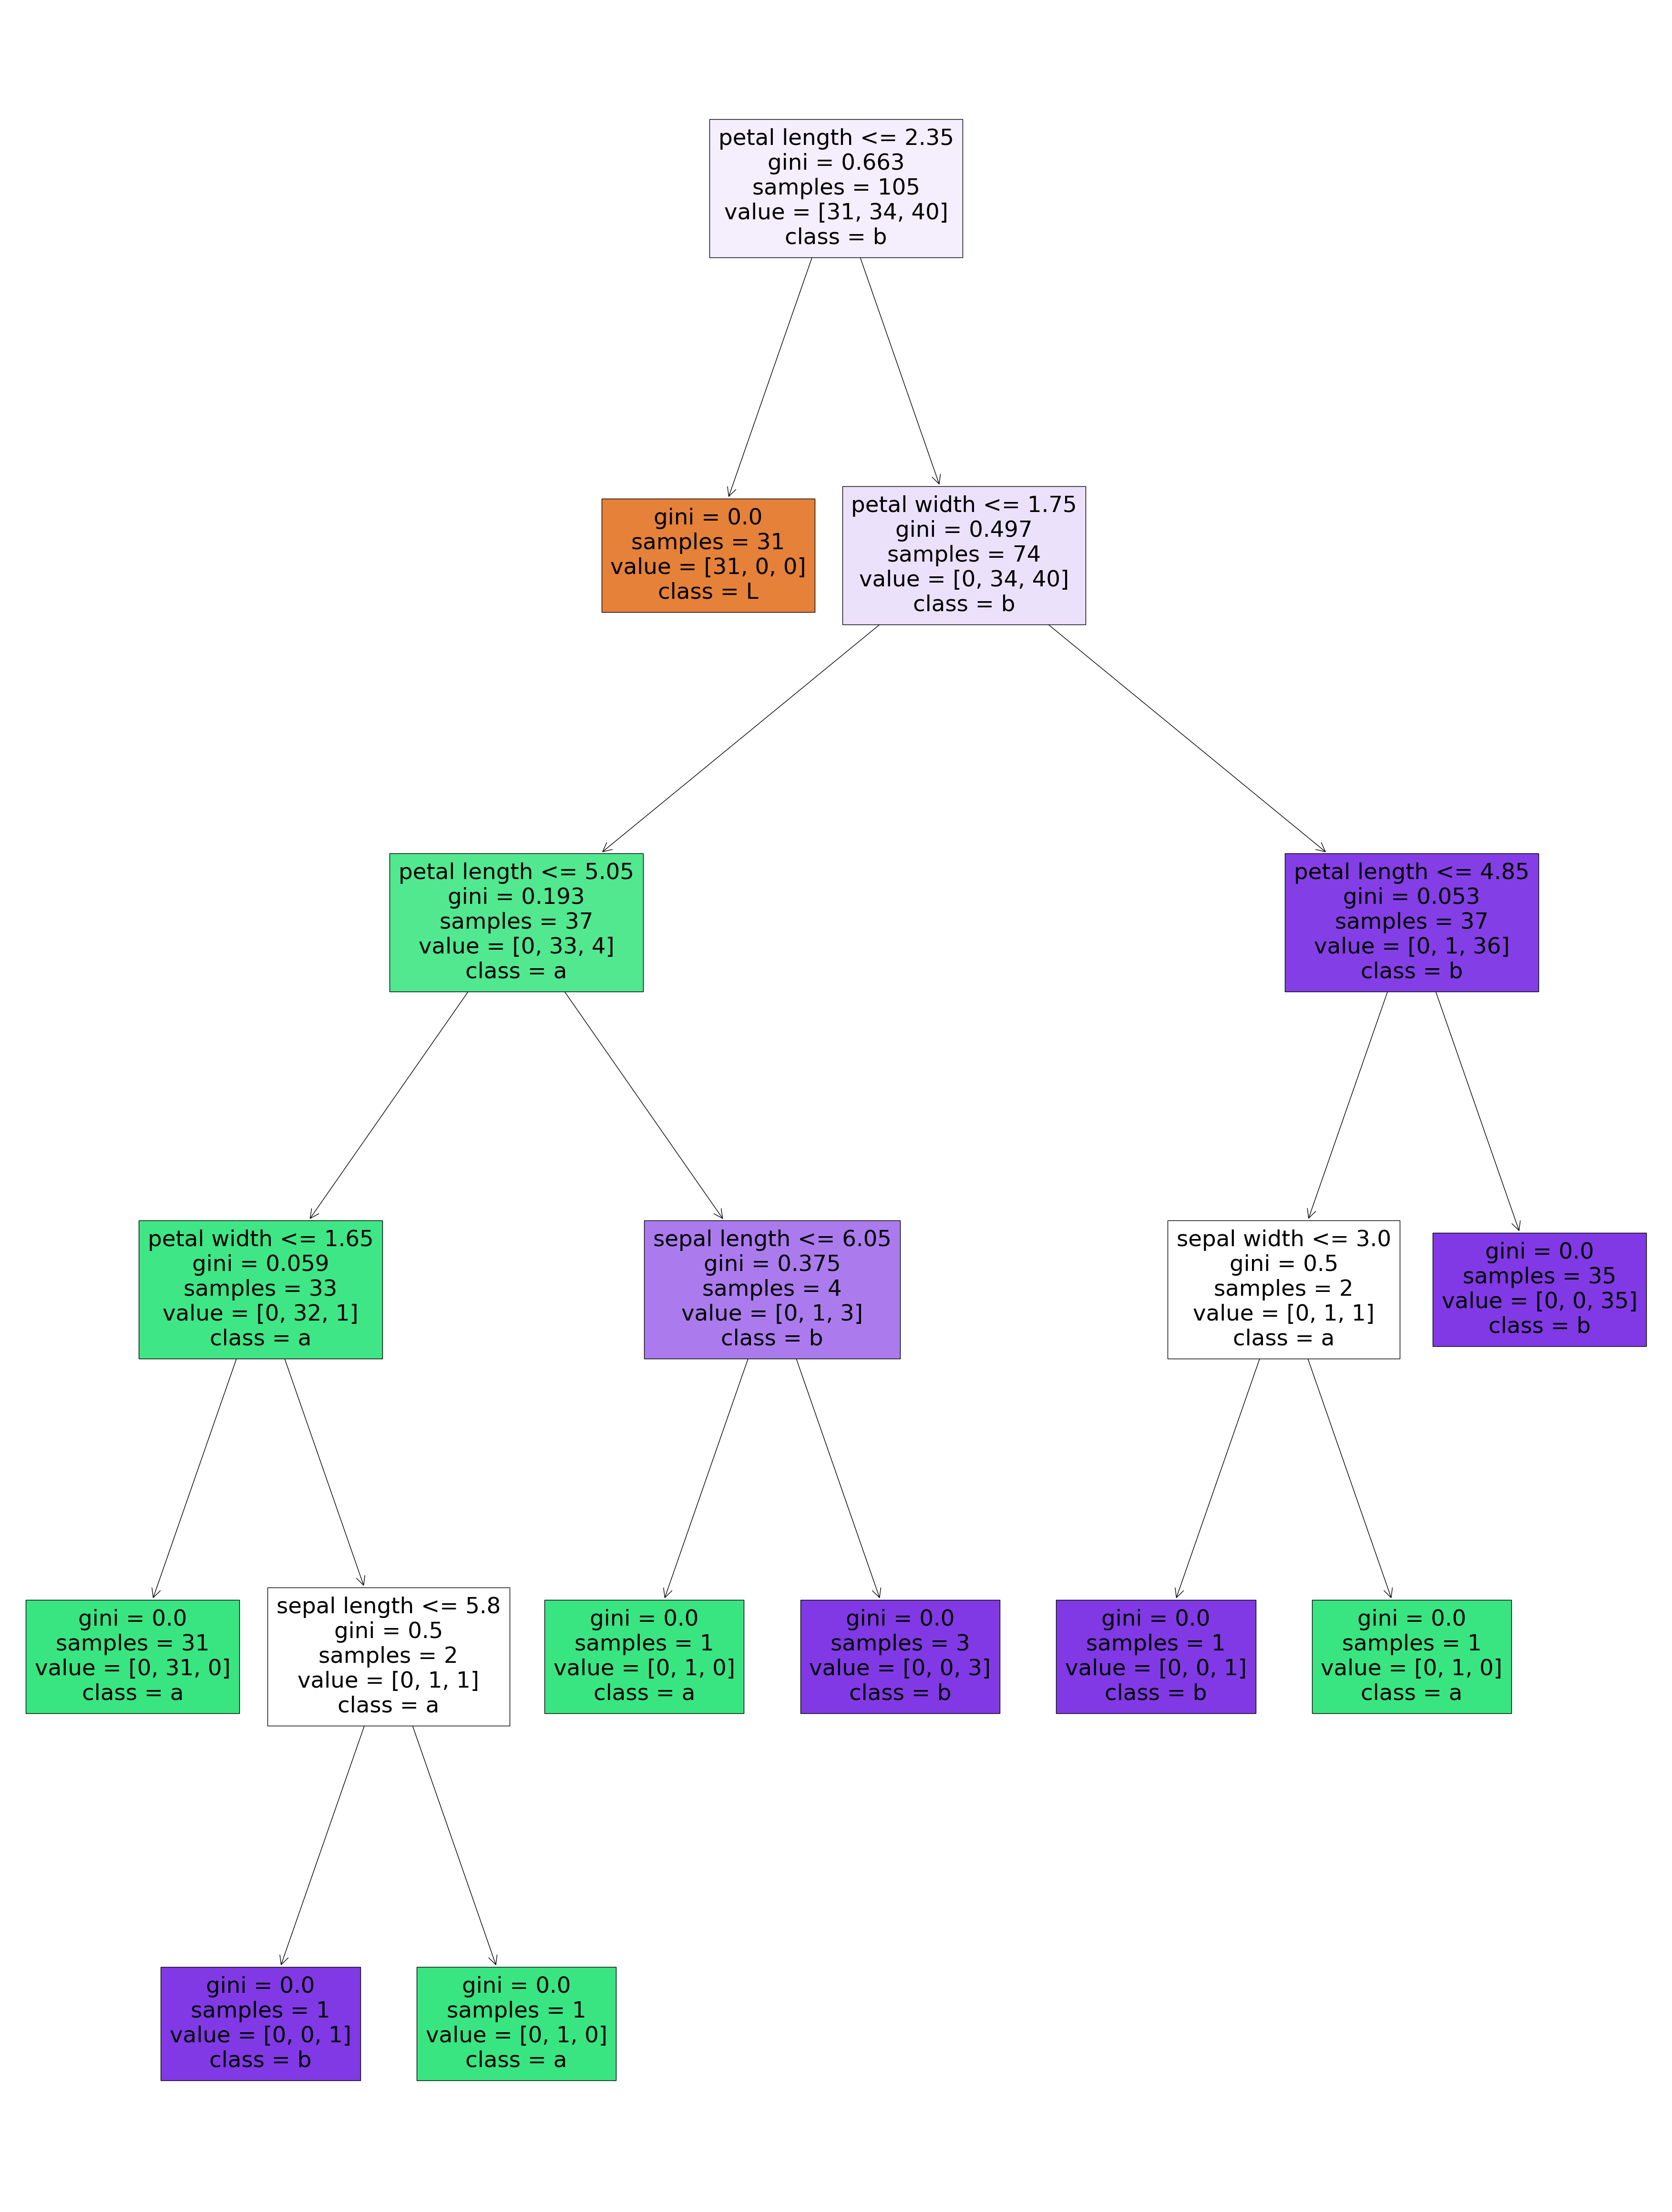

In [118]:
%%time

# it will take 5 to 6 mins to create image so wait.....
fig = plt.figure(figsize=(45,60)) 
dot_data = tree.plot_tree(model_dt3, 
                   feature_names=list(df.columns[:-1]),  
                   class_names=list(df.columns[-1]),
                   filled=True)
plt.savefig("tuned_model3.jpeg")

# Bagging Approach 

**Running Bagging Classifier model**

In [ ]:
#predicting using the Bagging_Classifier
model = BaggingClassifier(n_estimators=50, random_state=10) 

# try to increase the n_estimator  # min_samples_leaf=1, max_depth=None

#fit the model on the data and predict the values
model = model.fit(X_train,y_train)

y_pred=model.predict(X_test)


In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

**Running Random Forest model**

In [ ]:
%%time 
#predicting using the Random_Forest_Classifier
model_rf = RandomForestClassifier(n_estimators=500, 
                                          random_state=10,
                                         verbose=1,
                                        n_jobs=-1)

#fit the model on the data and predict the values
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)

In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

# Boosting Classifier

**Running Adaboost classifier**

In [ ]:
#predicting using the AdaBoost_Classifier
model_AdaBoost=AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(random_state=10),
                                 n_estimators=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,y_train)

y_pred=model_AdaBoost.predict(X_test)


In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

**Running Gradient Boosting classifier**

In [ ]:
#predicting using the Gradient_Boosting_Classifier
model_GradientBoosting = GradientBoostingClassifier(n_estimators=150,
                                                     random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,y_train)

y_pred=model_GradientBoosting.predict(X_test)


In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

### Ensembel Voting Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create the sub models
estimators = []
model1 = DecisionTreeClassifier(criterion="gini", random_state=10)
estimators.append(('cart', model1))
model2 = SVC(kernel="rbf", C=50, gamma=0.1)
estimators.append(('svm', model2))
model3 = KNeighborsClassifier(n_neighbors=8)
estimators.append(('knn', model3))

In [ ]:
estimators

In [ ]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,y_train)
y_pred=ensemble.predict(X_test)
#print(Y_pred)

In [ ]:
# confusion matrix  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}
print("---------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------Accuracy Score------------")
print(accuracy_score(y_test,y_pred))
print()
print("---------Classification Report------------")
print(classification_report(y_test,y_pred))

# Conclusion 

- based on above anlysis we can that the decision tree model performs better on test data 